In [1]:
- Linha/Serviço (Percurso, km, seccionamentos[itinerários], tabela de horários)
- Tipo de carro (Categoria, Cama Motorista)

Restrições da Legislação
###•	Motorista deve ter um intervalo de 11 horas entre jornadas
###•	Motorista deve ter um intervalo de 30 min a cada 4h intrajornada
•	No 7º dia de trabalho deve receber uma Folga de 36h 
###•	Carga horária de trabalho de 7:20h por jornada 
•	No máx 2h extras por viagem
•	Itinerarios

Cidades Base


Construir um cenário que as rotas vão sendo realizadas e eu tenha os locais que o motorista para para descansar





In [4]:
from datetime import datetime, timedelta

import random

capMotorista = 7.34


linhas_de_onibus = {
    'Linha 1': {
        'Cidades': ['Cidade A', 'Cidade B', 'Cidade C', 'Cidade D', 'Cidade E', 'Cidade F', 'Cidade G', 'Cidade H', 'Cidade I', 'Cidade J'],
        'Horarios': ['04/09/2023 08:00', '04/09/2023 09:30', '04/09/2023 11:15', '04/09/2023 13:45', '04/09/2023 15:30', '04/09/2023 17:00', '04/09/2023 18:45', '04/09/2023 20:15', '04/09/2023 22:00', '04/09/2023 23:30'],
        'Distancias': [20, 30, 45, 60, 75, 90, 105, 120, 135, 150]
    },
    'Linha 2': {
        'Cidades': ['Cidade X', 'Cidade Y', 'Cidade Z', 'Cidade W', 'Cidade V', 'Cidade U', 'Cidade T', 'Cidade S', 'Cidade R', 'Cidade Q'],
        'Horarios': ['04/09/2023 07:30', '04/09/2023 10:00', '04/09/2023 12:30', '04/09/2023 14:15', '04/09/2023 16:45', '04/09/2023 19:00', '04/09/2023 21:30', '04/09/2023 23:15', '05/09/2023 01:00', '05/09/2023 02:30'],
        'Distancias': [25, 35, 50, 65, 80, 95, 110, 125, 140, 155]
    },
    'Linha 3': {
        'Cidades': ['Cidade M', 'Cidade N', 'Cidade O', 'Cidade P', 'Cidade Q', 'Cidade R', 'Cidade S', 'Cidade T', 'Cidade U', 'Cidade V'],
        'Horarios': ['04/09/2023 08:15', '04/09/2023 09:45', '04/09/2023 11:30', '04/09/2023 13:00', '04/09/2023 15:00', '04/09/2023 16:30', '04/09/2023 18:15', '04/09/2023 20:00', '04/09/2023 22:15', '04/09/2023 23:45'],
        'Distancias': [30, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    },
    'Linha 4': {
        'Cidades': ['Cidade G', 'Cidade H', 'Cidade I', 'Cidade J', 'Cidade A', 'Cidade B', 'Cidade C', 'Cidade D', 'Cidade E', 'Cidade F'],
        'Horarios': ['04/09/2023 07:00', '04/09/2023 08:45', '04/09/2023 10:30', '04/09/2023 12:00', '04/09/2023 14:30', '04/09/2023 16:15', '04/09/2023 18:00', '04/09/2023 19:45', '04/09/2023 21:30', '04/09/2023 23:00'],
        'Distancias': [45, 60, 75, 90, 20, 30, 45, 60, 75, 90]
    },
    'Linha 5': {
        'Cidades': ['Cidade E', 'Cidade D', 'Cidade C', 'Cidade B', 'Cidade A', 'Cidade J', 'Cidade I', 'Cidade H', 'Cidade G', 'Cidade F'],
        'Horarios': ['04/09/2023 07:30', '04/09/2023 09:15', '04/09/2023 11:00', '04/09/2023 12:30', '04/09/2023 14:45', '04/09/2023 16:30', '04/09/2023 18:15', '04/09/2023 19:45', '04/09/2023 21:30', '04/09/2023 23:15'],
        'Distancias': [35, 50, 65, 80, 95, 90, 75, 60, 45, 30]
    }
}

linhas_de_onibus = { 
'Cascavel-RioBranco':{

'Cidades': ['CASCAVEL  GARAGEM' , 'CASCAVEL' , 'TOLEDO' , 'MARECHAL C RONDON' , 'PALOTINA - 4041' , 'GUAÍRA' , 'MUNDO NOVO' , 'ELDORADO' , 'ITAQUIRAÍ' , 'NAVIRAÍ' , 'CAARAPÓ - JUVENAL' , 'DOURADOS' , 'DOURADOS P. DE APOIO' , 'RIO BRILHANTE' , 'NOVA ALVORADA DO SUL' , 'CAMPO GRANDE' , 'CAMPO GRANDE (GARAGEM)' , 'SÃO GABRIEL DO OESTE' , 'RESTAURANTE TALISMÃ' , 'COXIM' , 'SONORA' , 'RONDONÓPOLIS' , 'JACIARA' , 'CUIABÁ' , 'CÁCERES' , 'ENTRONCAMENTO MIRASSOL' , 'PONTES E LACERDA' , 'COMODORO' , 'VILHENA' , 'PIMENTA BUENO' , 'CACOAL' , 'PRESIDENTE MEDICI' , 'JI-PARANÁ' , 'OURO PRETO' , 'JARÚ' , 'ARIQUEMES' , 'PORTO VELHO' , 'PORTO VELHO GARAGEM' , 'JACI-PARANÁ' , 'VISTA ALEGRE DO ABUNÃ' , 'EXTREMA' , 'RIO BRANCO' , 'RIO BRANCO GARAGEM'],
'Horarios': [ '06/09/2023 13:10' , '06/09/2023 14:15' , '06/09/2023 15:20' , '06/09/2023 16:10' , '06/09/2023 16:21' , '06/09/2023 17:25' , '06/09/2023 17:15' , '06/09/2023 17:50' , '06/09/2023 19:04' , '06/09/2023 19:50' , '06/09/2023 21:04' , '06/09/2023 22:00' , '06/09/2023 22:20' , '06/09/2023 23:19' , '06/09/2023 23:59' , '07/09/2023 01:40' , '07/09/2023 02:05' , '07/09/2023 04:24' , '07/09/2023 06:00' , '07/09/2023 06:30' , '07/09/2023 08:04' , '07/09/2023 09:50' , '07/09/2023 10:59' , '07/09/2023 13:00' , '07/09/2023 17:10' , '07/09/2023 18:20' , '07/09/2023 20:45' , '07/09/2023 23:49' , '08/09/2023 01:40' , '08/09/2023 05:05' , '08/09/2023 06:25' , '08/09/2023 07:40' , '08/09/2023 08:30' , '08/09/2023 09:35' , '08/09/2023 10:30' , '08/09/2023 12:00' , '08/09/2023 15:20' , '08/09/2023 15:45' , '08/09/2023 16:15' , '08/09/2023 19:55' , '08/09/2023 21:30' , '09/09/2023 00:40' , '09/09/2023 00:55']
}}


motoristas_disponiveis = ["motorista " + f"{x+1}" for x in range(50)]

#print(motoristas_disponiveis)

print()

EscalaGeral = {}

for k in linhas_de_onibus.keys():
    print(k,"______________________________________")
    ContHora = 0
    
    motorista = random.choice(motoristas_disponiveis)
    motoristas_disponiveis.remove(motorista)
    hrInMot = linhas_de_onibus[k]["Horarios"][0]
    
    escala = {}
    
    dadosViagem = [[],[],[]]
    trechoMot = []
    hrPartHrCheg = []

    ### Construção inicial da Escala ###
    for i in range(len(linhas_de_onibus[k]["Horarios"])):
        hora1 = datetime.strptime(hrInMot,  "%d/%m/%Y %H:%M")
        hora2 = datetime.strptime(linhas_de_onibus[k]["Horarios"][i],  "%d/%m/%Y %H:%M")
        diferenca = hora2 - hora1
        diferenca_em_minutos = (diferenca.seconds // 60)/60   # Minutos
        
        
        
        #### Restição de intervalos de 30 min a cada 4h intrajornada ###
        
        if diferenca_em_minutos >= 4 and not "Intervalo" in escala[motorista][0]:
            
            trechoMot.append("Intervalo")
            hrPartHrCheg.append([datetime.strptime(linhas_de_onibus[k]["Horarios"][i],  "%d/%m/%Y %H:%M"),datetime.strptime(linhas_de_onibus[k]["Horarios"][i],  "%d/%m/%Y %H:%M")])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
            
            
            
        #### Restição Capacidade de Carga horária de trabalho de 7:20h por jornada ###           
        if diferenca_em_minutos <= capMotorista:
            print(motorista, dadosViagem)
            
            if i == 0:
                horaAtual = hora1
            else:
                horaAtual = datetime.strptime(linhas_de_onibus[k]["Horarios"][i-1],  "%d/%m/%Y %H:%M")


            trechoMot.append(linhas_de_onibus[k]["Cidades"][i])
            hrPartHrCheg.append([horaAtual,hora2])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
        
        else:
            if i == 0:
                horaAtual = hora1
            else:
                horaAtual = datetime.strptime(linhas_de_onibus[k]["Horarios"][i-1],  "%d/%m/%Y %H:%M")
                                 
            trechoMot.append(linhas_de_onibus[k]["Cidades"][i])
            hrPartHrCheg.append([horaAtual,hora2])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            
            
            ### Intervalo Entre Jornadas   ###
            IntervaloEntre = [hrPartHrCheg[-1][1], hrPartHrCheg[-1][1]+ timedelta(hours=11)]
            dadosViagem[2] = IntervaloEntre
            escala[motorista] = dadosViagem
            
            ### Troca de Motorista  ###

            
            motorista = random.choice(motoristas_disponiveis)
            motoristas_disponiveis.remove(motorista)
            hrInMot = linhas_de_onibus[k]["Horarios"][i]
            
            dadosViagem = [[],[],[]]
            trechoMot = []
            hrPartHrCheg = []
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
            
    EscalaGeral[k] = escala

            
        #print(linhas_de_onibus[k]["Cidades"][i],linhas_de_onibus[k]["Horarios"][i],diferenca_em_minutos)
##print(EscalaGeral)



#for i in EscalaGeral:
#    print("")
#    print(i.keys())
    



for x,y in EscalaGeral["Cascavel-RioBranco"].items():
    print(x)
    print(y[2])

    


Cascavel-RioBranco ______________________________________
motorista 22 [[], [], []]
motorista 22 [['CASCAVEL  GARAGEM'], [[datetime.datetime(2023, 9, 6, 13, 10), datetime.datetime(2023, 9, 6, 13, 10)]], []]
motorista 22 [['CASCAVEL  GARAGEM', 'CASCAVEL'], [[datetime.datetime(2023, 9, 6, 13, 10), datetime.datetime(2023, 9, 6, 13, 10)], [datetime.datetime(2023, 9, 6, 13, 10), datetime.datetime(2023, 9, 6, 14, 15)]], []]
motorista 22 [['CASCAVEL  GARAGEM', 'CASCAVEL', 'TOLEDO'], [[datetime.datetime(2023, 9, 6, 13, 10), datetime.datetime(2023, 9, 6, 13, 10)], [datetime.datetime(2023, 9, 6, 13, 10), datetime.datetime(2023, 9, 6, 14, 15)], [datetime.datetime(2023, 9, 6, 14, 15), datetime.datetime(2023, 9, 6, 15, 20)]], []]
motorista 22 [['CASCAVEL  GARAGEM', 'CASCAVEL', 'TOLEDO', 'MARECHAL C RONDON'], [[datetime.datetime(2023, 9, 6, 13, 10), datetime.datetime(2023, 9, 6, 13, 10)], [datetime.datetime(2023, 9, 6, 13, 10), datetime.datetime(2023, 9, 6, 14, 15)], [datetime.datetime(2023, 9, 6, 

[datetime.datetime(2023, 9, 6, 21, 4), datetime.datetime(2023, 9, 7, 8, 4)]
[datetime.datetime(2023, 9, 7, 6, 0), datetime.datetime(2023, 9, 7, 17, 0)]
[datetime.datetime(2023, 9, 7, 17, 10), datetime.datetime(2023, 9, 8, 4, 10)]
[datetime.datetime(2023, 9, 8, 1, 40), datetime.datetime(2023, 9, 8, 12, 40)]
[datetime.datetime(2023, 9, 8, 9, 35), datetime.datetime(2023, 9, 8, 20, 35)]
[datetime.datetime(2023, 9, 8, 19, 55), datetime.datetime(2023, 9, 9, 6, 55)]
[]


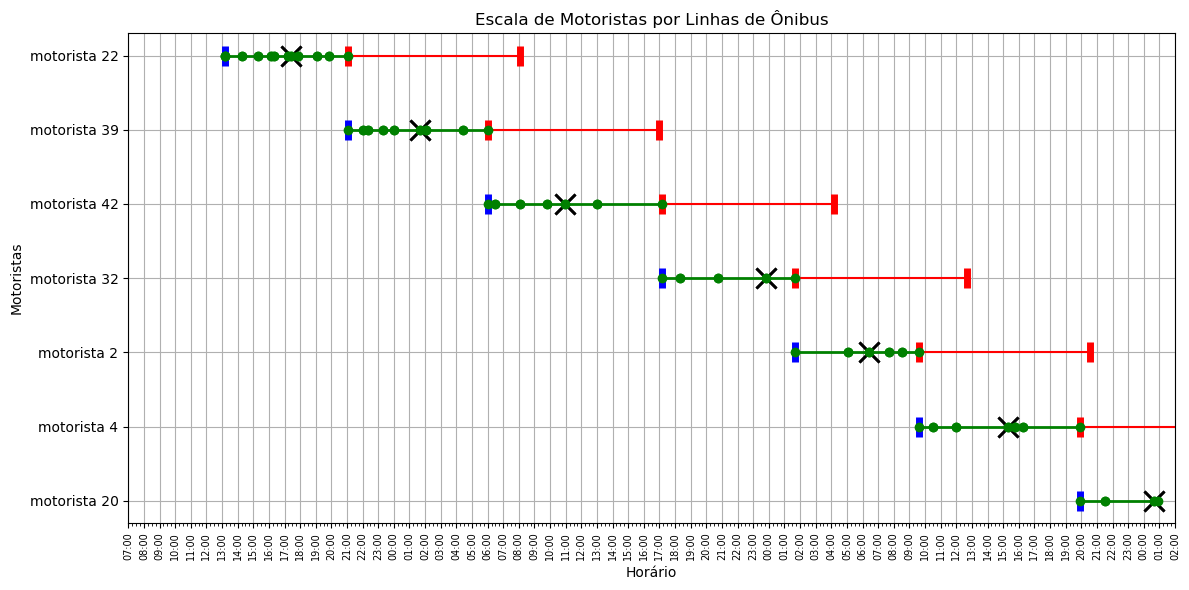

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta



dados = EscalaGeral

def plot_schedule(data):
    fig, ax = plt.subplots(figsize=(12, 6))

    linhas = list(data.keys())
    y_positions = {}  # Dicionário para mapear motoristas para posições no eixo Y

    for i, linha in enumerate(linhas):
        motoristas = data[linha]


        for motorista, viagens in motoristas.items():
            if motorista not in y_positions:
                y_positions[motorista] = len(y_positions) + 1

            y = y_positions[motorista]  # Posição vertical do motorista

            cidades = viagens[0]
            horarios = viagens[1]
            IntervaloEntre = viagens[2]
            print(IntervaloEntre)
            
            if IntervaloEntre != []:
                ax.plot(IntervaloEntre, [y,y], marker='|', c="r", markersize=15, mew=5)

            if cidades and horarios:
                for j in range(len(cidades)):
                    cidade = cidades[j]

                    if j < len(horarios):
                        inicio = horarios[j][0]
                        fim = horarios[j][1]
                        
                        # Calcula a duração da viagem em horas
                        duracao_horas = (fim - inicio).total_seconds() / 3600

                        # Plotagem da linha
                        if j == 0:
                            ax.plot([inicio], [y], marker='|', c="b", markersize=15, mew=5)
                            
                            
                            

                        if cidade == "Intervalo":
                            ax.plot([inicio, fim], [y, y], marker='x', c="k", markersize=15, mew=2)
                        else:
                            ax.plot([inicio, fim], [y, y], marker='o', lw=2, c="g")
                            

    ax.set_yticks(range(1, len(y_positions) + 1))
    ax.set_yticklabels(list(y_positions.keys()))
    ax.invert_yaxis()
    ax.set_xlabel('Horário')
    ax.set_ylabel('Motoristas')
    ax.set_title('Escala de Motoristas por Linhas de Ônibus')

    # Defina os limites do eixo x para cobrir apenas um dia
    data_min = datetime(2023, 9, 6, 7, 0)
    data_max = datetime(2023, 9, 9, 2, 0)
    ax.set_xlim(data_min, data_max)

    # Configuração das datas no eixo x
    horas = mdates.HourLocator(interval=1)
    minutos = mdates.MinuteLocator(interval=15)
    ax.xaxis.set_major_locator(horas)
    ax.xaxis.set_minor_locator(minutos)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    plt.xticks(rotation=90, fontsize = 7)  # Rotaciona os rótulos do eixo x para melhor legibilidade
    plt.tight_layout()
    plt.grid()
    plt.show()

# Substitua 'dados' pelo seu dicionário de dados
plot_schedule(dados)

Cascavel-RioBranco
motorista 31
0 CASCAVEL  GARAGEM 2023-09-06 13:10:00 2023-09-06 13:10:00 0.0
1 CASCAVEL 2023-09-06 13:10:00 2023-09-06 14:15:00 1.0833333333333333
2 TOLEDO 2023-09-06 14:15:00 2023-09-06 15:20:00 1.0833333333333333
3 MARECHAL C RONDON 2023-09-06 15:20:00 2023-09-06 16:10:00 0.8333333333333334
4 PALOTINA - 4041 2023-09-06 16:10:00 2023-09-06 16:21:00 0.18333333333333332
5 Intervalo 2023-09-06 17:25:00 2023-09-06 17:25:00 0.0
6 GUAÍRA 2023-09-06 16:21:00 2023-09-06 17:25:00 1.0666666666666667
7 MUNDO NOVO 2023-09-06 17:25:00 2023-09-06 17:15:00 -0.16666666666666666
8 ELDORADO 2023-09-06 17:15:00 2023-09-06 17:50:00 0.5833333333333334
9 ITAQUIRAÍ 2023-09-06 17:50:00 2023-09-06 19:04:00 1.2333333333333334
10 NAVIRAÍ 2023-09-06 19:04:00 2023-09-06 19:50:00 0.7666666666666667
11 CAARAPÓ - JUVENAL 2023-09-06 19:50:00 2023-09-06 21:04:00 1.2333333333333334
motorista 22
0 DOURADOS 2023-09-06 21:04:00 2023-09-06 22:00:00 0.9333333333333333
1 DOURADOS P. DE APOIO 2023-09-06 22:

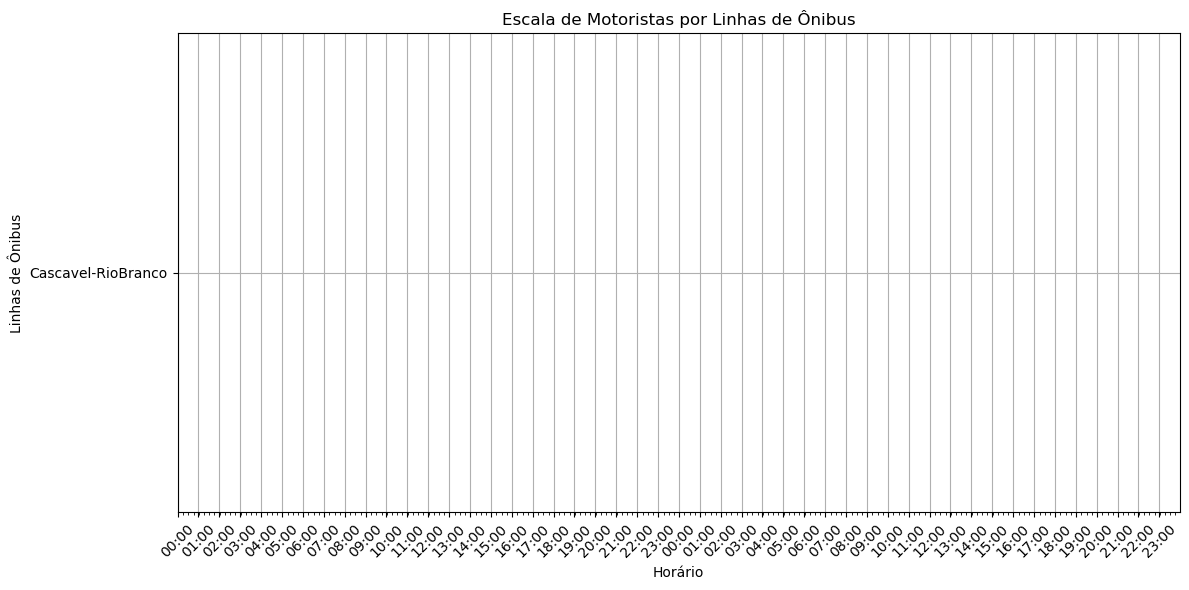

In [3]:


def plot_schedule(data):
    fig, ax = plt.subplots(figsize=(12, 6))

    linhas = list(data.keys())

    for i, linha in enumerate(linhas):
        print(linha)
        motoristas = data[linha]
        y = i + 1  # Posição vertical da linha do ônibus

        for motorista, viagens in motoristas.items():
            print(motorista)
            cidades = viagens[0]
            horarios = viagens[1]

            if cidades and horarios:
                for j in range(len(cidades)):
                    cidade = cidades[j]
                                      
                    if j < len(horarios):
                        
                        inicio = horarios[j][0]
                        fim = horarios[j][1]
                        
                        # Calcula a duração da viagem em horas
                        duracao_horas = (fim - inicio).total_seconds() / 3600
                        
                        print(j,cidade, inicio, fim, duracao_horas)

                        # Plotagem da linha
                        if j == 0:
                            ax.plot([inicio], [y], marker='|', c="b", markersize = 15, mew= 5)
                        
                        if cidade == "Intervalo":
                            ax.plot([inicio, fim], [y, y], marker='x', c="k", markersize = 15, mew= 2)
                            
                        
                            
                        else:
                            ax.plot([inicio, fim], [y, y], marker='o', lw=2, c = "g")

    ax.set_yticks(range(1, len(linhas) + 1))
    ax.set_yticklabels(linhas)
    ax.invert_yaxis()
    ax.set_xlabel('Horário')
    ax.set_ylabel('Linhas de Ônibus')
    ax.set_title('Escala de Motoristas por Linhas de Ônibus')
    
    # Defina os limites do eixo x para cobrir apenas um dia
    data_min = datetime(2023, 9, 4, 0, 0)
    data_max = datetime(2023, 9, 5, 23, 59)
    ax.set_xlim(data_min, data_max)

    # Configuração das datas no eixo x
    horas = mdates.HourLocator(interval=1)
    minutos = mdates.MinuteLocator(interval=15)
    ax.xaxis.set_major_locator(horas)
    ax.xaxis.set_minor_locator(minutos)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
    plt.tight_layout()
    #plt.legend()
    plt.grid()
    plt.show()



plot_schedule(dados)


In [131]:


import random

# Defina suas variáveis e dados do problema
motoristas = []  # Lista de motoristas disponíveis
trechos_linha_onibus = []  # Lista de trechos da linha de ônibus


# Outras informações sobre os trechos, como horários e distâncias, devem ser definidas aqui

# Função para verificar se uma atribuição viola as restrições
def verifica_restricao(atribuicao):
    # Implemente as verificações de restrição, como carga horária, intervalo entre jornadas, intervalos intrajornada, etc.
    # Retorne True se a atribuição violar alguma restrição, caso contrário, retorne False

# Função para gerar uma solução inicial
def gerar_solucao_inicial():
    atribuicao = {}  # Dicionário que mapeia trechos para motoristas
    motoristas_disponiveis = motoristas.copy()
    
    for trecho in trechos_linha_onibus:
        motorista = random.choice(motoristas_disponiveis)
        atribuicao[trecho] = motorista
        motoristas_disponiveis.remove(motorista)
        
        if verifica_restricao(atribuicao):
            # Implemente a lógica para trocar o motorista, se necessário
            # Certifique-se de que a troca atenda às restrições

    return atribuicao

# Executar a função para gerar uma solução inicial
solucao_inicial = gerar_solucao_inicial()

# Avaliar a qualidade da solução inicial e fazer melhorias, se necessário

# Continuar com a otimização ou outras etapas do processo

# Lembre-se de que este é apenas um esboço básico. Você deve implementar todas as verificações de restrição, lógica de troca de motorista e avaliação da solução inicial de acordo com as necessidades específicas do seu problema.


IndentationError: expected an indented block (474733600.py, line 20)

In [6]:
from datetime import datetime, timedelta

import random

capMotorista = 7.34

linhas_de_onibus = {
    'Linha 1': {
        'Cidades': ['Cidade A', 'Cidade B', 'Cidade C', 'Cidade D', 'Cidade E', 'Cidade F', 'Cidade G', 'Cidade H', 'Cidade I', 'Cidade J'],
        'Horarios': ['04/09/2023 08:00', '04/09/2023 09:30', '04/09/2023 11:15', '04/09/2023 13:45', '04/09/2023 15:30', '04/09/2023 17:00', '04/09/2023 18:45', '04/09/2023 20:15', '04/09/2023 22:00', '04/09/2023 23:30'],
        'Distancias': [20, 30, 45, 60, 75, 90, 105, 120, 135, 150]
    },
    'Linha 2': {
        'Cidades': ['Cidade X', 'Cidade Y', 'Cidade Z', 'Cidade W', 'Cidade V', 'Cidade U', 'Cidade T', 'Cidade S', 'Cidade R', 'Cidade Q'],
        'Horarios': ['04/09/2023 07:30', '04/09/2023 10:00', '04/09/2023 12:30', '04/09/2023 14:15', '04/09/2023 16:45', '04/09/2023 19:00', '04/09/2023 21:30', '04/09/2023 23:15', '05/09/2023 01:00', '05/09/2023 02:30'],
        'Distancias': [25, 35, 50, 65, 80, 95, 110, 125, 140, 155]
    },
    'Linha 3': {
        'Cidades': ['Cidade M', 'Cidade N', 'Cidade O', 'Cidade P', 'Cidade Q', 'Cidade R', 'Cidade S', 'Cidade T', 'Cidade U', 'Cidade V'],
        'Horarios': ['04/09/2023 08:15', '04/09/2023 09:45', '04/09/2023 11:30', '04/09/2023 13:00', '04/09/2023 15:00', '04/09/2023 16:30', '04/09/2023 18:15', '04/09/2023 20:00', '04/09/2023 22:15', '04/09/2023 23:45'],
        'Distancias': [30, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    },
    'Linha 4': {
        'Cidades': ['Cidade G', 'Cidade H', 'Cidade I', 'Cidade J', 'Cidade A', 'Cidade B', 'Cidade C', 'Cidade D', 'Cidade E', 'Cidade F'],
        'Horarios': ['04/09/2023 07:00', '04/09/2023 08:45', '04/09/2023 10:30', '04/09/2023 12:00', '04/09/2023 14:30', '04/09/2023 16:15', '04/09/2023 18:00', '04/09/2023 19:45', '04/09/2023 21:30', '04/09/2023 23:00'],
        'Distancias': [45, 60, 75, 90, 20, 30, 45, 60, 75, 90]
    },
    'Linha 5': {
        'Cidades': ['Cidade E', 'Cidade D', 'Cidade C', 'Cidade B', 'Cidade A', 'Cidade J', 'Cidade I', 'Cidade H', 'Cidade G', 'Cidade F'],
        'Horarios': ['04/09/2023 07:30', '04/09/2023 09:15', '04/09/2023 11:00', '04/09/2023 12:30', '04/09/2023 14:45', '04/09/2023 16:30', '04/09/2023 18:15', '04/09/2023 19:45', '04/09/2023 21:30', '04/09/2023 23:15'],
        'Distancias': [35, 50, 65, 80, 95, 90, 75, 60, 45, 30]
    }
}



motoristas_disponiveis = ["motorista " + f"{x+1}" for x in range(50)]
                          
EscalaGeral = {}

for k in linhas_de_onibus.keys():
    ContHora = 0
    motorista = random.choice(motoristas_disponiveis)
    motoristas_disponiveis.remove(motorista)
    hrInMot = linhas_de_onibus[k]["Horarios"][0]
    escala = {}
    dadosViagem = [[],[],[]]
    trechoMot = []
    hrPartHrCheg = []

    ### Construção inicial da Escala ###
    for i in range(len(linhas_de_onibus[k]["Horarios"])):
        hora1 = datetime.strptime(hrInMot,  "%d/%m/%Y %H:%M")
        hora2 = datetime.strptime(linhas_de_onibus[k]["Horarios"][i],  "%d/%m/%Y %H:%M")
        diferenca = hora2 - hora1
        diferenca_em_minutos = (diferenca.seconds // 60)/60   # Minutos
        
        #### Restição de intervalos de 30 min a cada 4h intrajornada ###
        if diferenca_em_minutos >= 4 and not "Intervalo" in escala[motorista][0]:
            trechoMot.append("Intervalo")
            hrPartHrCheg.append([datetime.strptime(linhas_de_onibus[k]["Horarios"][i],  "%d/%m/%Y %H:%M"),datetime.strptime(linhas_de_onibus[k]["Horarios"][i],  "%d/%m/%Y %H:%M")])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
            
        #### Restição Capacidade de Carga horária de trabalho de 7:20h por jornada ###           
        if diferenca_em_minutos <= capMotorista:          
            if i == 0:
                horaAtual = hora1
            else:
                horaAtual = datetime.strptime(linhas_de_onibus[k]["Horarios"][i-1],  "%d/%m/%Y %H:%M")
            trechoMot.append(linhas_de_onibus[k]["Cidades"][i])
            hrPartHrCheg.append([horaAtual,hora2])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
        else:
            if i == 0:
                horaAtual = hora1
            else:
                horaAtual = datetime.strptime(linhas_de_onibus[k]["Horarios"][i-1],  "%d/%m/%Y %H:%M")
                                 
            trechoMot.append(linhas_de_onibus[k]["Cidades"][i])
            hrPartHrCheg.append([horaAtual,hora2])
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            
            ### Intervalo Entre Jornadas   ###
            IntervaloEntre = [hrPartHrCheg[-1][1], hrPartHrCheg[-1][1]+ timedelta(hours=11)]
            dadosViagem[2] = IntervaloEntre
            escala[motorista] = dadosViagem
    
            ### Troca de Motorista  ###
            motorista = random.choice(motoristas_disponiveis)
            motoristas_disponiveis.remove(motorista)
            hrInMot = linhas_de_onibus[k]["Horarios"][i]
            
            dadosViagem = [[],[],[]]
            trechoMot = []
            hrPartHrCheg = []
            dadosViagem[0] = trechoMot
            dadosViagem[1] = hrPartHrCheg
            escala[motorista] = dadosViagem
            
    EscalaGeral[k] = escala

EscalaGeral
    

{'Linha 1': {'motorista 42': [['Cidade A',
    'Cidade B',
    'Cidade C',
    'Intervalo',
    'Cidade D',
    'Cidade E'],
   [[datetime.datetime(2023, 9, 4, 8, 0), datetime.datetime(2023, 9, 4, 8, 0)],
    [datetime.datetime(2023, 9, 4, 8, 0),
     datetime.datetime(2023, 9, 4, 9, 30)],
    [datetime.datetime(2023, 9, 4, 9, 30),
     datetime.datetime(2023, 9, 4, 11, 15)],
    [datetime.datetime(2023, 9, 4, 13, 45),
     datetime.datetime(2023, 9, 4, 13, 45)],
    [datetime.datetime(2023, 9, 4, 11, 15),
     datetime.datetime(2023, 9, 4, 13, 45)],
    [datetime.datetime(2023, 9, 4, 13, 45),
     datetime.datetime(2023, 9, 4, 15, 30)]],
   [datetime.datetime(2023, 9, 4, 15, 30),
    datetime.datetime(2023, 9, 5, 2, 30)]],
  'motorista 45': [['Cidade F',
    'Cidade G',
    'Intervalo',
    'Cidade H',
    'Cidade I',
    'Cidade J'],
   [[datetime.datetime(2023, 9, 4, 15, 30),
     datetime.datetime(2023, 9, 4, 17, 0)],
    [datetime.datetime(2023, 9, 4, 17, 0),
     datetime.datetim